In [2]:
#ML Project on Predicting Heart Disease
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#A) Data Analysis:
#c. Find the correlation between all fields.

In [3]:
#a. Import the dataset
df = pd.read_csv("healthcare_data.csv",sep=",")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [4]:
#b. Get information about dataset (mean, max, min, quartiles etc.)
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
df=df.dropna()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [9]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
df['gender'] = le.fit_transform(df['gender'])

In [11]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1


<AxesSubplot:xlabel='stroke', ylabel='count'>

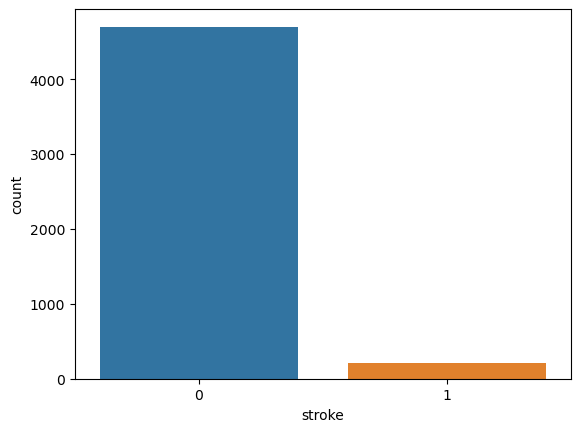

In [12]:
# B) Data Visualization:
# a. Visualize the number of patients having a heart disease and not having a heart disease.
sns.countplot(x=df["stroke"])


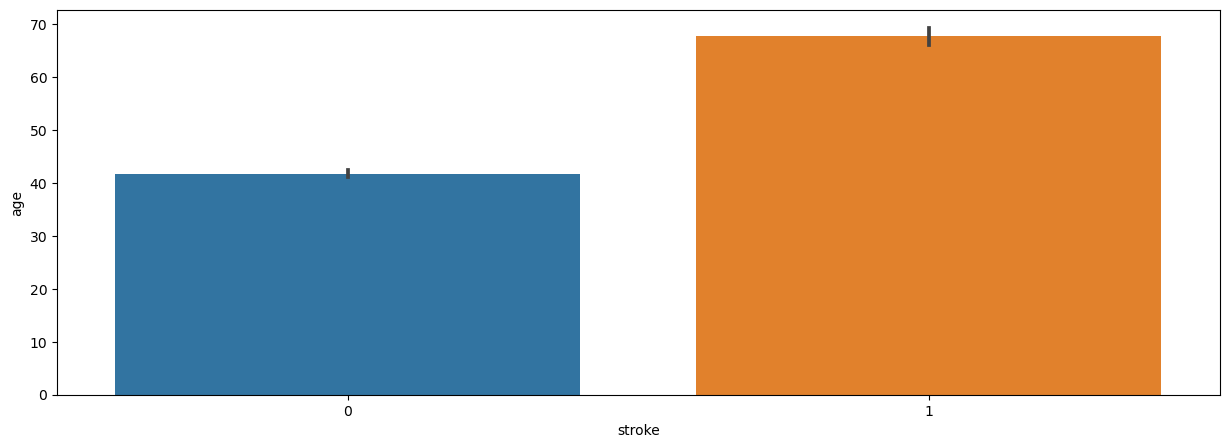

In [14]:
# b. Visualize the age and weather patient has disease or not
plt.figure(figsize = (15, 5))
sns.barplot(x = 'stroke', y = 'age', data = df);

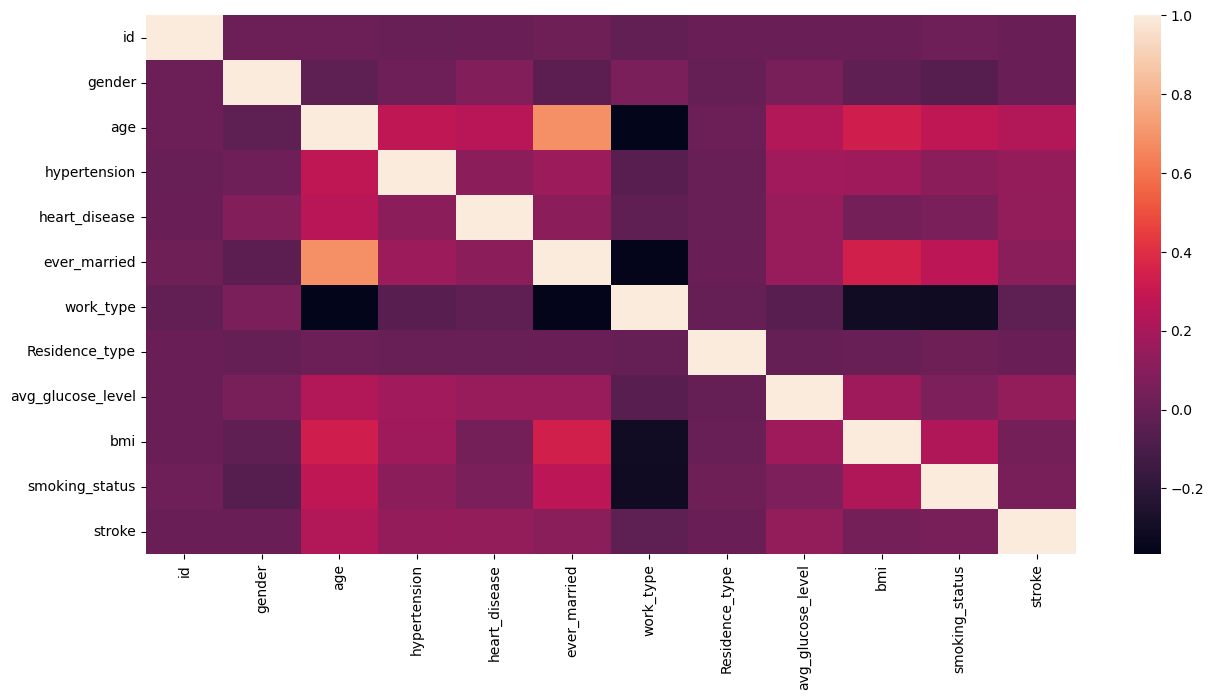

In [15]:
# c. Visualize correlation between all features using a heat map
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr());

In [ ]:
# C) Logistic Regression:
# a. Build a simple logistic regression model
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and get the accuracy score

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
y = df.iloc[:, -1]
X = df.iloc[:, 1:10]
# Divide the dataset into training and test sets in 80:20 ratio.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
linear = LogisticRegression()
linear.fit(x_train,y_train)
y_pred=linear.predict(x_test)
print ("Accuracy Score is: {}".format(round(accuracy_score(y_pred, y_test),4)))

Accuracy Score is: 0.9633


C:\Users\Shree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
confusion_matrix(y_test,y_pred)

array([[1418,    0],
       [  54,    1]], dtype=int64)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       1.00      0.02      0.04        55

    accuracy                           0.96      1473
   macro avg       0.98      0.51      0.51      1473
weighted avg       0.96      0.96      0.95      1473



In [ ]:
# D) Decision Tree:
# a. Build a decision tree model
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy
# iv. Visualize the decision tree using the graphviz package

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Confusion Matrix :')
print(confusion_matrix(y_pred,y_test))
print('Accuracy: ',accuracy_score(y_test,y_pred))


Confusion Matrix :
[[1332   45]
 [  86   10]]
Accuracy:  0.9110658520027155


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1418
           1       0.10      0.18      0.13        55

    accuracy                           0.91      1473
   macro avg       0.54      0.56      0.54      1473
weighted avg       0.94      0.91      0.92      1473



In [ ]:
# E) Random Forest:
# a. Build a Random Forest model 
# i. Divide the dataset in 70:30 ratio
# ii. Build the model on train set and predict the values on test set
# iii. Build the confusion matrix and calculate the accuracy
# iv. Visualize the model using the graphviz package

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=300)

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)

print('Confusion Matrix :')
print(confusion_matrix(y_pred,y_test))
cf_mat=confusion_matrix(y_pred,y_test)
print('Accuracy Score :',accuracy_score(y_test,y_pred))

Confusion Matrix :
[[1414   54]
 [   4    1]]
Accuracy Score : 0.9606245756958588


In [ ]:
# F) Select the best model
# a. Print the confusion matrix of all classifiers
# b. Print the classification report of all classifiers
# c. Calculate Recall Precision and F1 score of all the models
# d. Visualize confusion matrix using heatmaps 
# e. Select the best model based on the best accuracie

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1418
           1       0.33      0.02      0.03        55

    accuracy                           0.96      1473
   macro avg       0.65      0.51      0.51      1473
weighted avg       0.94      0.96      0.95      1473



<AxesSubplot:>

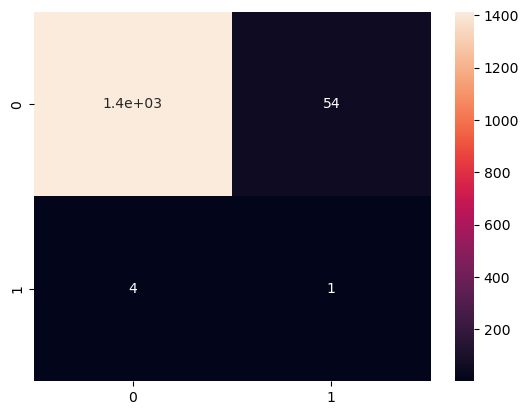

In [34]:
sns.heatmap(cf_mat, annot=True)


In [ ]:
The best model based on the best accuracie Random Forest is  Random Forest.